In [1]:
!pip install opencv-python-headless matplotlib


## 📷 Image Acquisition

We begin by importing the required libraries and loading an image of a chessboard. The image used here is a clean top-down view of a chessboard with standard 8x8 squares.

This image was sourced from a public dataset and uploaded to the Colab environment.


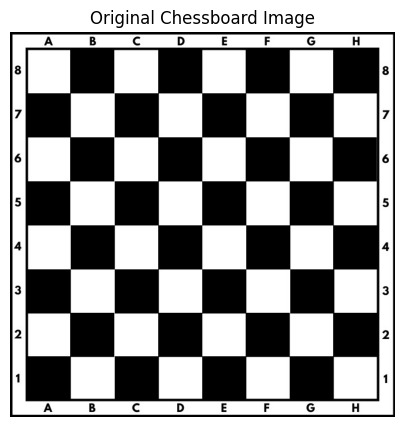

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the uploaded image
img = cv2.imread('/content/chessboard5.jpg')

# Display the original image
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Chessboard Image")
plt.axis("off")
plt.show()


## 🧹 Preprocessing

To ensure consistent analysis across different image sources, we normalize the image by resizing it and converting it to grayscale.

This helps simplify brightness-based classification later and ensures uniform square sizes.


In [48]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize for consistent 8x8 grid processing
img = cv2.resize(img, (400, 400))
gray = cv2.resize(gray, (400, 400))


## ♟️ Square Detection & Classification

We divide the image into an 8x8 grid. Each cell's average brightness is used to classify it as a black or white square.

The results are also visualized with annotations.


In [49]:
# Define grid size
grid_size = 8
h, w = gray.shape
cell_h = h // grid_size
cell_w = w // grid_size

# Count variables
black_count, white_count = 0, 0

# Create a copy for drawing annotations
annotated_img = img.copy()

# Loop over the grid to classify each square
for i in range(grid_size):
    for j in range(grid_size):
        y1 = i * cell_h
        y2 = (i + 1) * cell_h
        x1 = j * cell_w
        x2 = (j + 1) * cell_w

        cell = gray[y1:y2, x1:x2]
        mean = np.mean(cell)

        # Classify based on brightness threshold
        if mean < 127:
            black_count += 1
            color = (0, 0, 255)  # Red border for black
        else:
            white_count += 1
            color = (255, 255, 255)  # White border for white

        # Annotate the cell
        cv2.rectangle(annotated_img, (x1, y1), (x2, y2), color, 1)


## ✅ Validation & Output

The final counts of black and white squares are printed below. The annotated chessboard confirms the detection visually.


Black squares: 32
White squares: 32


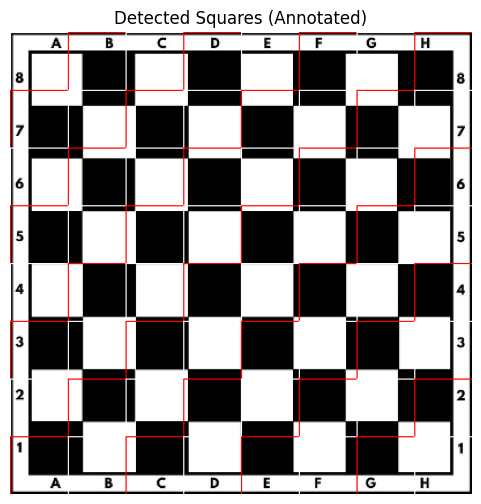

In [50]:
# Print counts
print(f"Black squares: {black_count}")
print(f"White squares: {white_count}")

# Show annotated chessboard
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Squares (Annotated)")
plt.axis("off")
plt.show()
